## Example 10.3: Application of the Implicit Scheme for Parabolic PDEs

Use the implicit scheme to solve the problem of Example 10.2. Use a lattice with $N=25$ intervals. Try time steps of $\Delta t = 0.00075$ and $\Delta t=0.005$. 

Compare to the exact solution by graphing the results at $t=0.045$.

Solution:

Let's begin by copying over the exact solution, and the initial function. 

Then we will write a function that implements the algorithm.

In [2]:
import numpy as np

# Define the initial function:
def phiInitialfunc(x):
    """The initial function"""
    return np.exp(-20 * (x-0.5)**2) - np.exp(-20*(x-3/2)**2) - np.exp(-20*(x+1/2)**2)

# define the S function:
def Sfunc(x,t):
    """The S function for the parabolic PDE"""
    return 0.

# define the exact solution:
def phiExact(x,t):
    """Returns the exact solution of the problem"""
    tau = 1 + 80 * t
    phiex = tau**(-0.5) * ( np.exp(-20 * (x-0.5)**2/tau) - np.exp(-20 * (x-1.5)**2/tau) - np.exp(-20*(x+0.5)**2/tau))
    return phiex

# the function that implements the implicit scheme
def EvolveImplicit(phiInitial, S, Deltat, tmin, tmax, N):
    """Calculates the time evolution of the Parabolic PDE from tmin to tmax using the implicit scheme"""
    # calculate the spacing between lattice points
    h = 1/N
    # calculate the number of time steps:
    nt = int((tmax-tmin)/Deltat)
    # discretize the initial function on the lattice:  
    x = np.linspace(0,1,N+1)
    phii = phiInitial(x)
    # list of numpy arrays to hold the time-stepped lattices
    phi = [phii] # start with the initial condition
    # calculate the auxiliary variables necessary for the implicit algorithm
    A0 = 1 + 2 * Deltat / h**2
    Apm = - Deltat / h**2
    # prepare the arrays for the alpha, beta and gamma coefficients:
    # these should be the same size as the lattice:
    alpha = np.zeros(N+1)
    beta = np.zeros(N+1)
    gamma = np.zeros(N+1)
    # set the values of alpha and gamma towards the end of the lattice:
    alpha[N-1] = 0
    gamma[N-1] = -1/A0
    # go through the lattice in a *backward* sweep,
    # calculate the alpha and gamma *once and for all*
    # these do not need to be recalculated!
    for i in range(N-1, 0, -1): # backwards
        alpha[i-1] = gamma[i] * Apm
        gamma[i-1] = -1/(A0 + Apm * alpha[i-1])
    # we are now ready for the time loop:
    for ti in range(nt):
        # add the next time step
        # note that if the boundary conditions were not zero 
        # then this would have to be reflected in the array defined 
        # by setting the elements explicitly
        phi.append(np.zeros(N+1)) 
        # set the last beta element:
        beta[N-1] = phi[ti][N]
        # do a backward sweep and find the beta at this time:
        for i in range(N-1, 0, -1): # backwards
            beta[i-1] = gamma[i] * (Apm * beta[i] - phi[ti][i])
        # now find the values of phi at the next step using 
        # alpha and beta, moving *forward*
        for i in range(N):
            phi[ti+1][i+1] = alpha[i] * phi[ti+1][i] + beta[i]
    # we are done, return
    return phi
    


In [10]:
import timeit

# Run: 
Deltat = 0.00075
tmin = 0
tmax = 0.045
N = 25

phiSol = EvolveImplicit(phiInitialfunc, Sfunc, Deltat, tmin, tmax, N)

# change the time step:
Deltat = 0.005
%timeit phiSol2 = EvolveImplicit(phiInitialfunc, Sfunc, Deltat, tmin, tmax, N)

238 µs ± 5.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


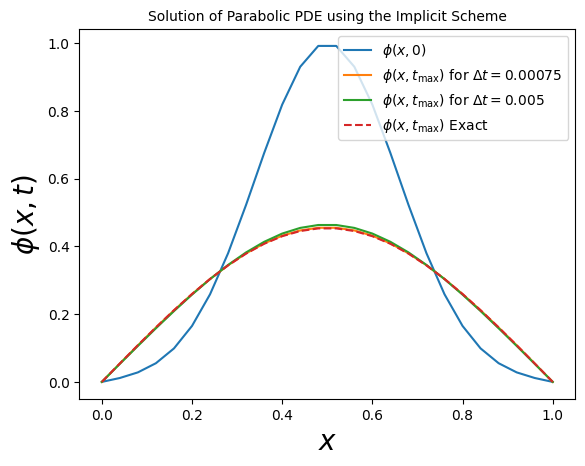

In [93]:
# Plot the solution: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$\phi(x,t)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Solution of Parabolic PDE using the Implicit Scheme', fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
x = np.linspace(0,1,N+1)
ax.plot(x, phiSol[0], label=r'$\phi(x,0)$') 
ax.plot(x, phiSol[-1], label=r'$\phi(x,t_\mathrm{max})$ for $\Delta t=0.00075$', ls='-') 

ax.plot(x, phiSol2[-1], label=r'$\phi(x,t_\mathrm{max})$ for $\Delta t=0.005$', ls='-') 
ax.plot(x, phiExact(x,0.045), label=r'$\phi(x,t_\mathrm{max})$ Exact', ls='--') 

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here